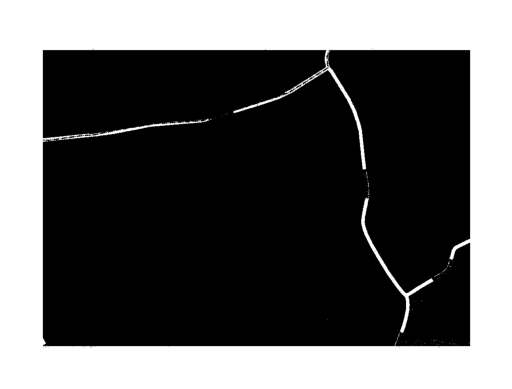

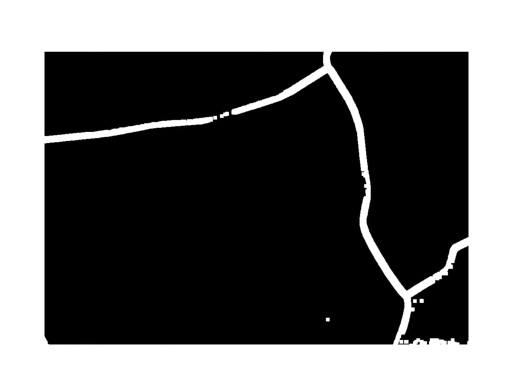

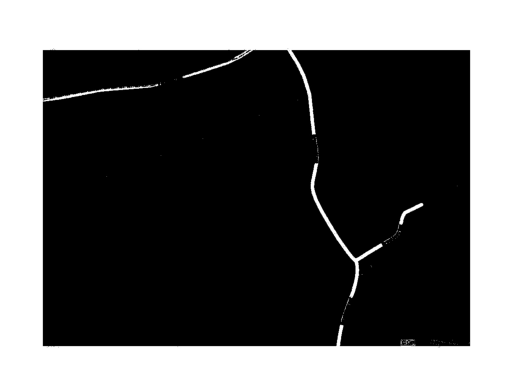

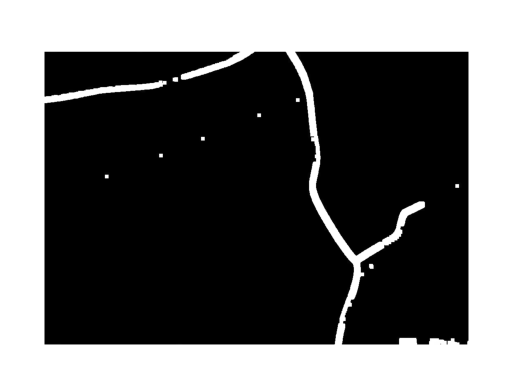

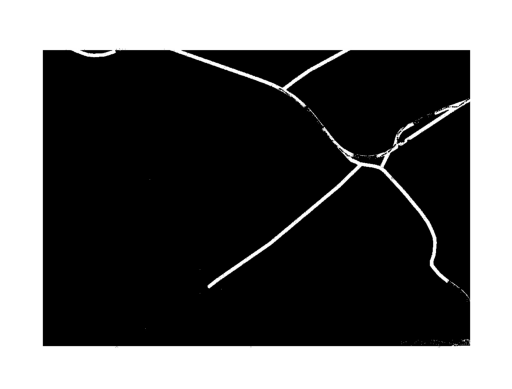

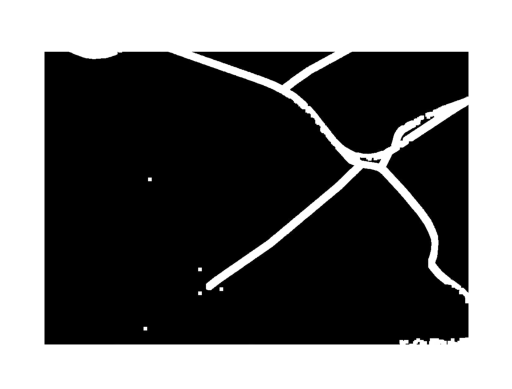

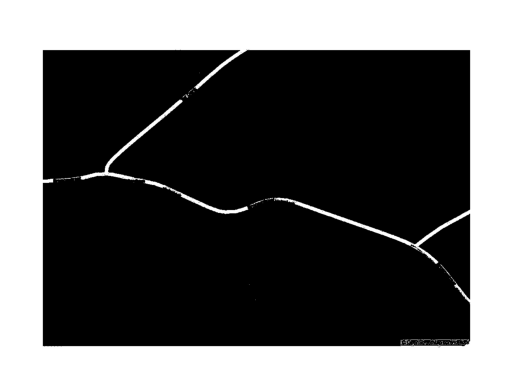

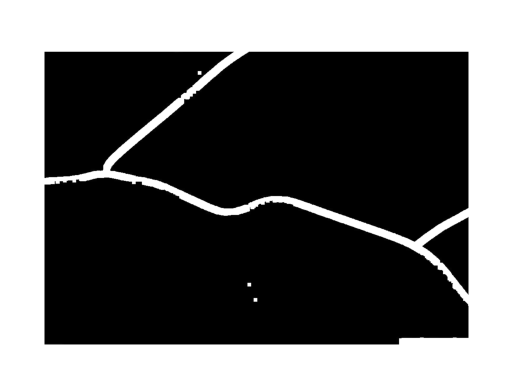

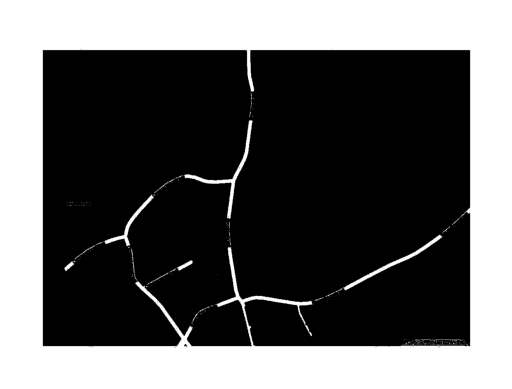

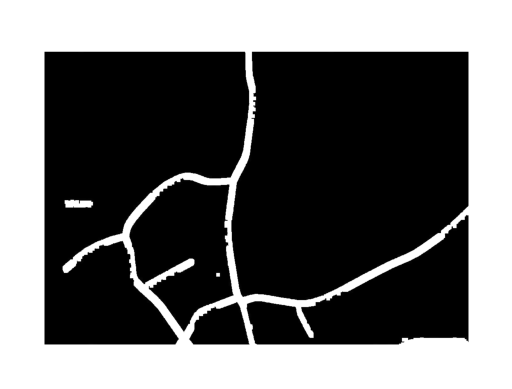

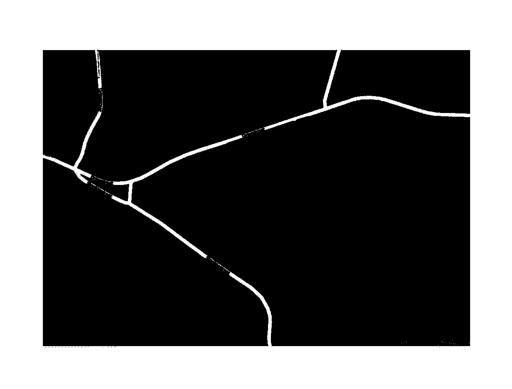

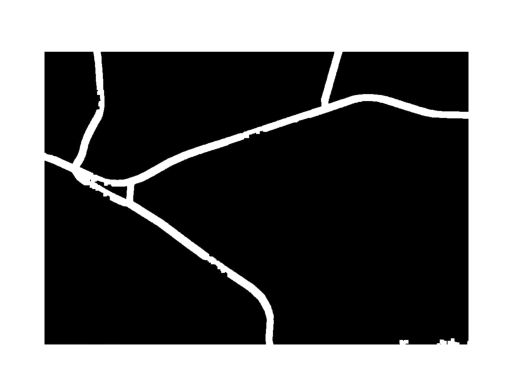

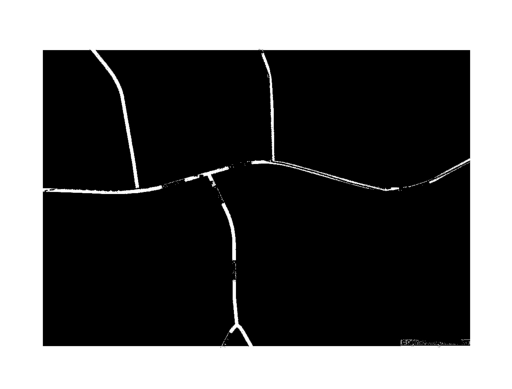

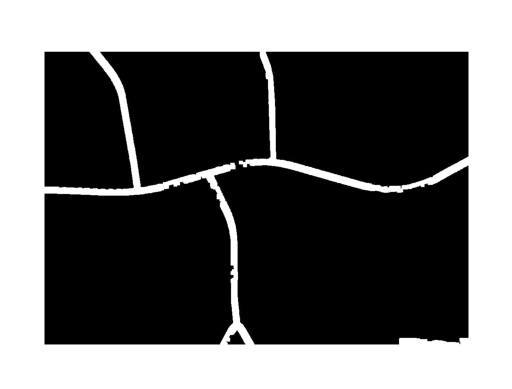

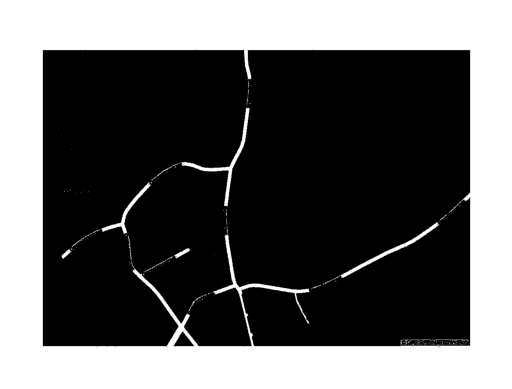

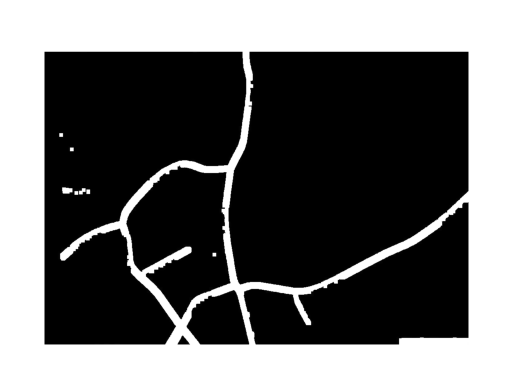

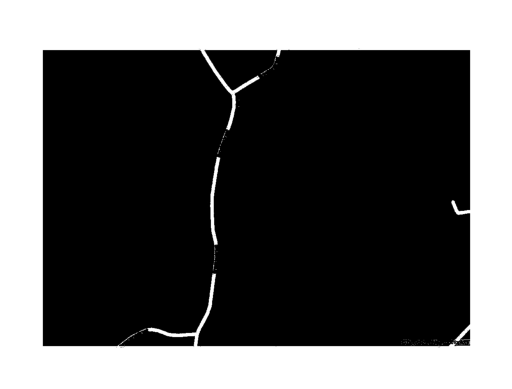

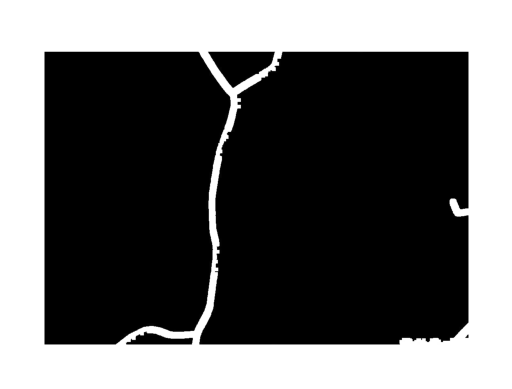

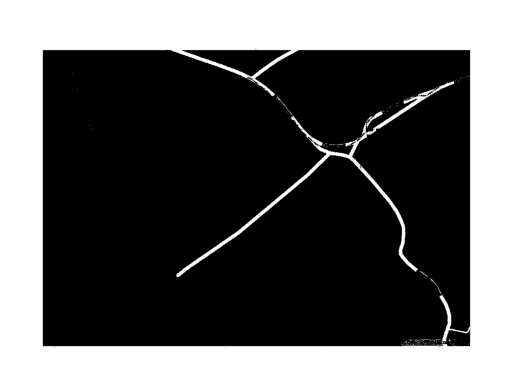

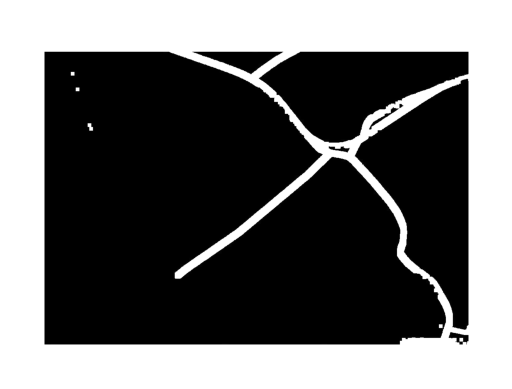

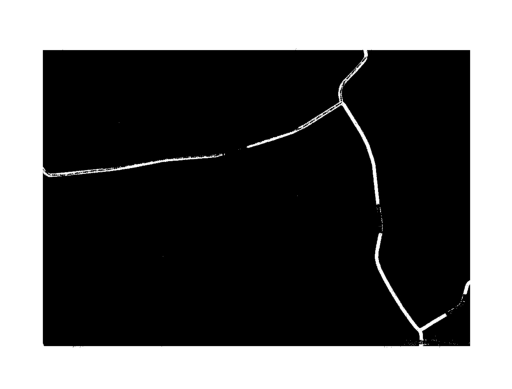

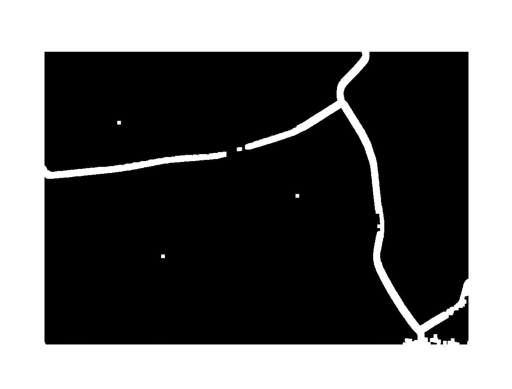

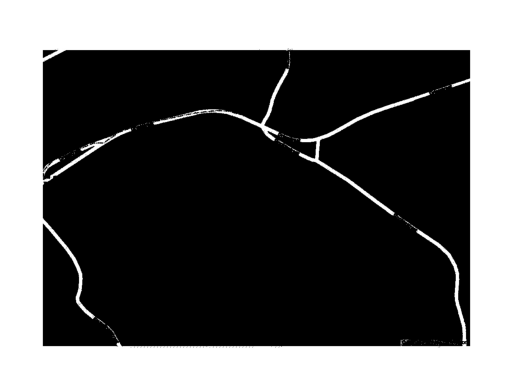

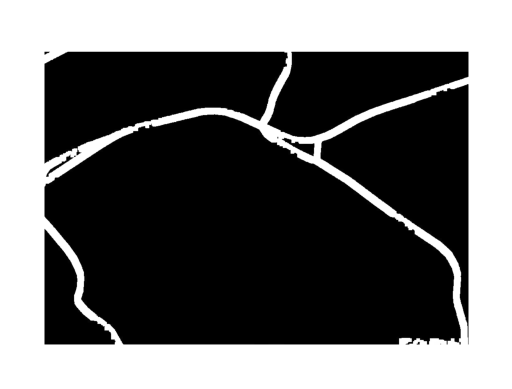

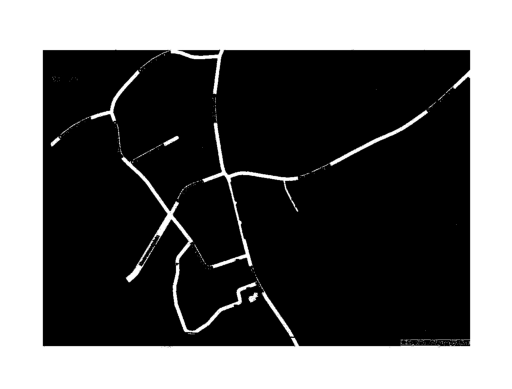

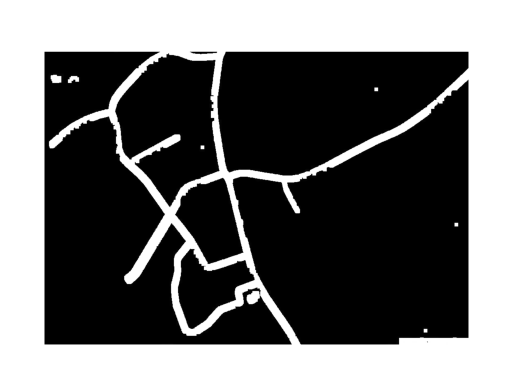

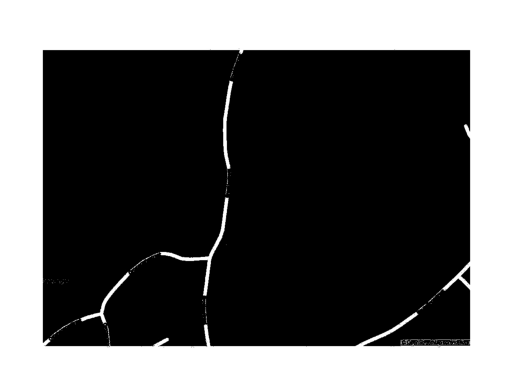

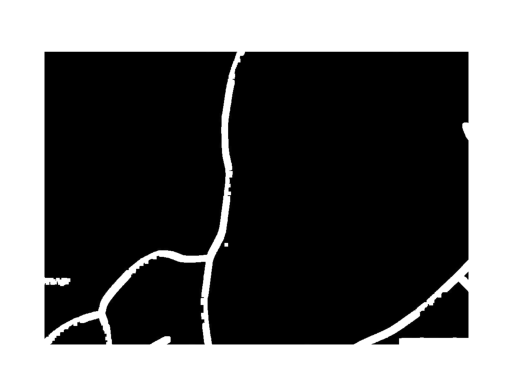

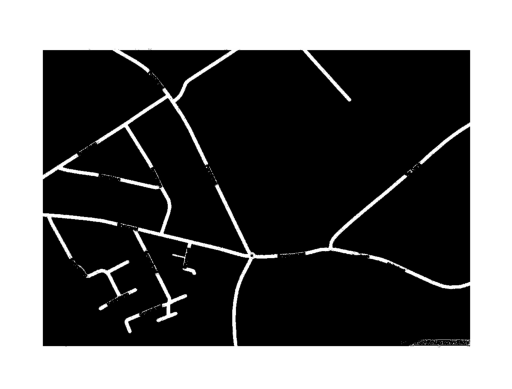

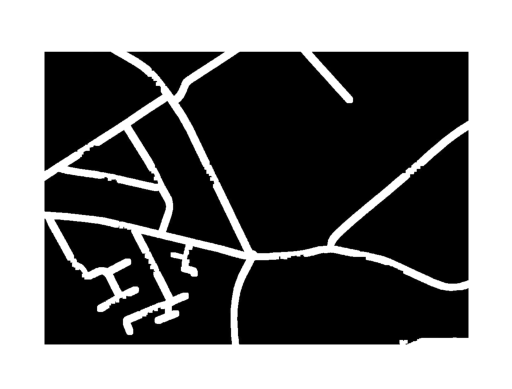

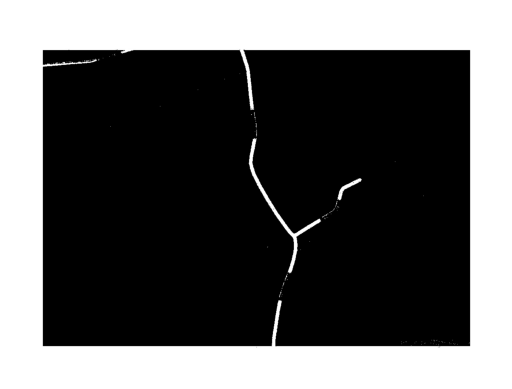

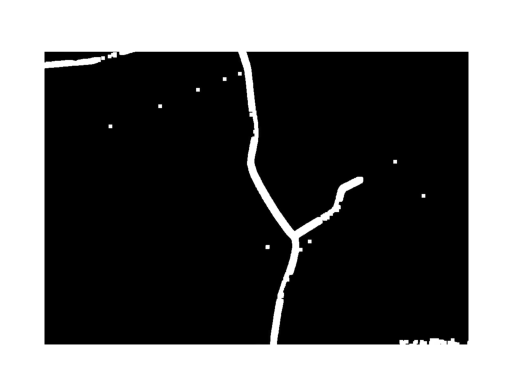

In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

def find_lines_in_map_mask(map_mask_path) :
    map_mask = cv2.imread(map_mask_path)



    # Plot the image
    plt.imshow(cv2.cvtColor(map_mask, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Optional: Turn off axes
    plt.show()

    # Define the structuring element (kernel)
    kernel = np.ones((5, 5), np.uint8)  # Example: 5x5 square kernel
    
    # Perform the dilation operation
    dilated_image = cv2.dilate(map_mask, kernel, iterations=2)

    # Plot the image
    plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Optional: Turn off axes
    plt.show()
    
    # Find contours in the binary image
    # map_mask_gray = cv2.cvtColor(map_mask, cv2.COLOR_BGR2GRAY)
    # contours, _ = cv2.findContours(map_mask_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # filled_img = np.zeros_like(map_mask)
    # cv2.drawContours(filled_img, contours, -1, (255, 255, 255), 1)

    # Find Houghlines in the binary image
    # dilated_image_bgr = dilated_image.copy()
    # dilated_image_rgb = cv2.cvtColor(dilated_image_bgr, cv2.COLOR_BGR2RGB)
    # dilated_image_gray = cv2.cvtColor(dilated_image, cv2.COLOR_BGR2GRAY)
    # lines = cv2.HoughLines(dilated_image_gray, 1, np.pi / 180, threshold=155)
    # hough_lines_image = np.zeros_like(dilated_image_rgb)
    # Draw the detected lines on the image
    # draw_lines(hough_lines_image, lines)
    # original_image_with_hough_lines = weighted_img(hough_lines_image, dilated_image_rgb)
    # print(lines)

    # Perform erosion operation
    # Define the structuring element
    # kernel = np.ones((3, 3), np.uint8)  # Adjust the kernel size as needed
    
    # Perform erosion
    # eroded_image = cv2.erode(dilated_image, kernel, iterations=1)  # Adjust the number of iterations as needed



    # Plot the image
    # plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')  # Optional: Turn off axes
    # plt.show()




count = 0
map_masks_dir = os.path.join(os.getcwd(), "osm_maps", "2020_KBK_masked_maps")
for map_mask in os.listdir(map_masks_dir) : 
    if map_mask.endswith("jpg") : 
        if count > 15 : 
            continue
        find_lines_in_map_mask(os.path.join(map_masks_dir, map_mask))
        count += 1



In [23]:
import folium

# Create a map centered at a specific location
map_osm = folium.Map(location=[50.85866	, 3.29640], zoom_start=20, tiles="Stamen Terrain")

# Add the custom tileset with roads in white and the rest in black
# folium.TileLayer('https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png', name='Custom Tileset', control=False).add_to(map_osm)

# plot image using pyplot



map_osm